# Analysis of FIFA 2017 Player Rating Data

A recent dataset popped up on Kaggle which is the complete FIFA 2017 (the videogame) player dataset. It contains a whole bunch of player statistics, and most importantly the player rating. We'll have a look at the data, and then run some predictive analysis to see how well we can use this data to predict player ratings. 

https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global


## Cleaning & Exploration

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use("ggplot")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":14,"axes.labelsize":18})   

df = pd.read_csv("D:\Downloads\complete-fifa-2017-player-dataset-global\FullData.csv")
df.info()
df["Birth_Date"] = pd.to_datetime(df["Birth_Date"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17588 non-null object
Nationality           17588 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17588 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17588 non-null int64
Height                17588 non-null object
Weight                17588 non-null object
Preffered_Foot        17588 non-null object
Birth_Date            17588 non-null object
Age                   17588 non-null int64
Preffered_Position    17588 non-null object
Work_Rate             17588 non-null object
Weak_foot             17588 non-null int64
Skill_Moves           17588 non-null int64
Ball_Control          17588 non-null int64
Dribbling      

We see that most of our data are numeric, but there are a few objects and floating data types. In the subsequent prediction analysis we'll only concern ourself with the integer numerics, but there is obviously potential gains to be made by incorporating the qualitative data (i.e. player position).

In [2]:
# Create dataframe of values for use in prediction analysis (i.e. features and target)
df_vals = df.select_dtypes(["int64"])
df_vals = df_vals.drop("Rating", axis = 1)
rating = df["Rating"]
df_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 37 columns):
Age                   17588 non-null int64
Weak_foot             17588 non-null int64
Skill_Moves           17588 non-null int64
Ball_Control          17588 non-null int64
Dribbling             17588 non-null int64
Marking               17588 non-null int64
Sliding_Tackle        17588 non-null int64
Standing_Tackle       17588 non-null int64
Aggression            17588 non-null int64
Reactions             17588 non-null int64
Attacking_Position    17588 non-null int64
Interceptions         17588 non-null int64
Vision                17588 non-null int64
Composure             17588 non-null int64
Crossing              17588 non-null int64
Short_Pass            17588 non-null int64
Long_Pass             17588 non-null int64
Acceleration          17588 non-null int64
Speed                 17588 non-null int64
Stamina               17588 non-null int64
Strength              17588 non

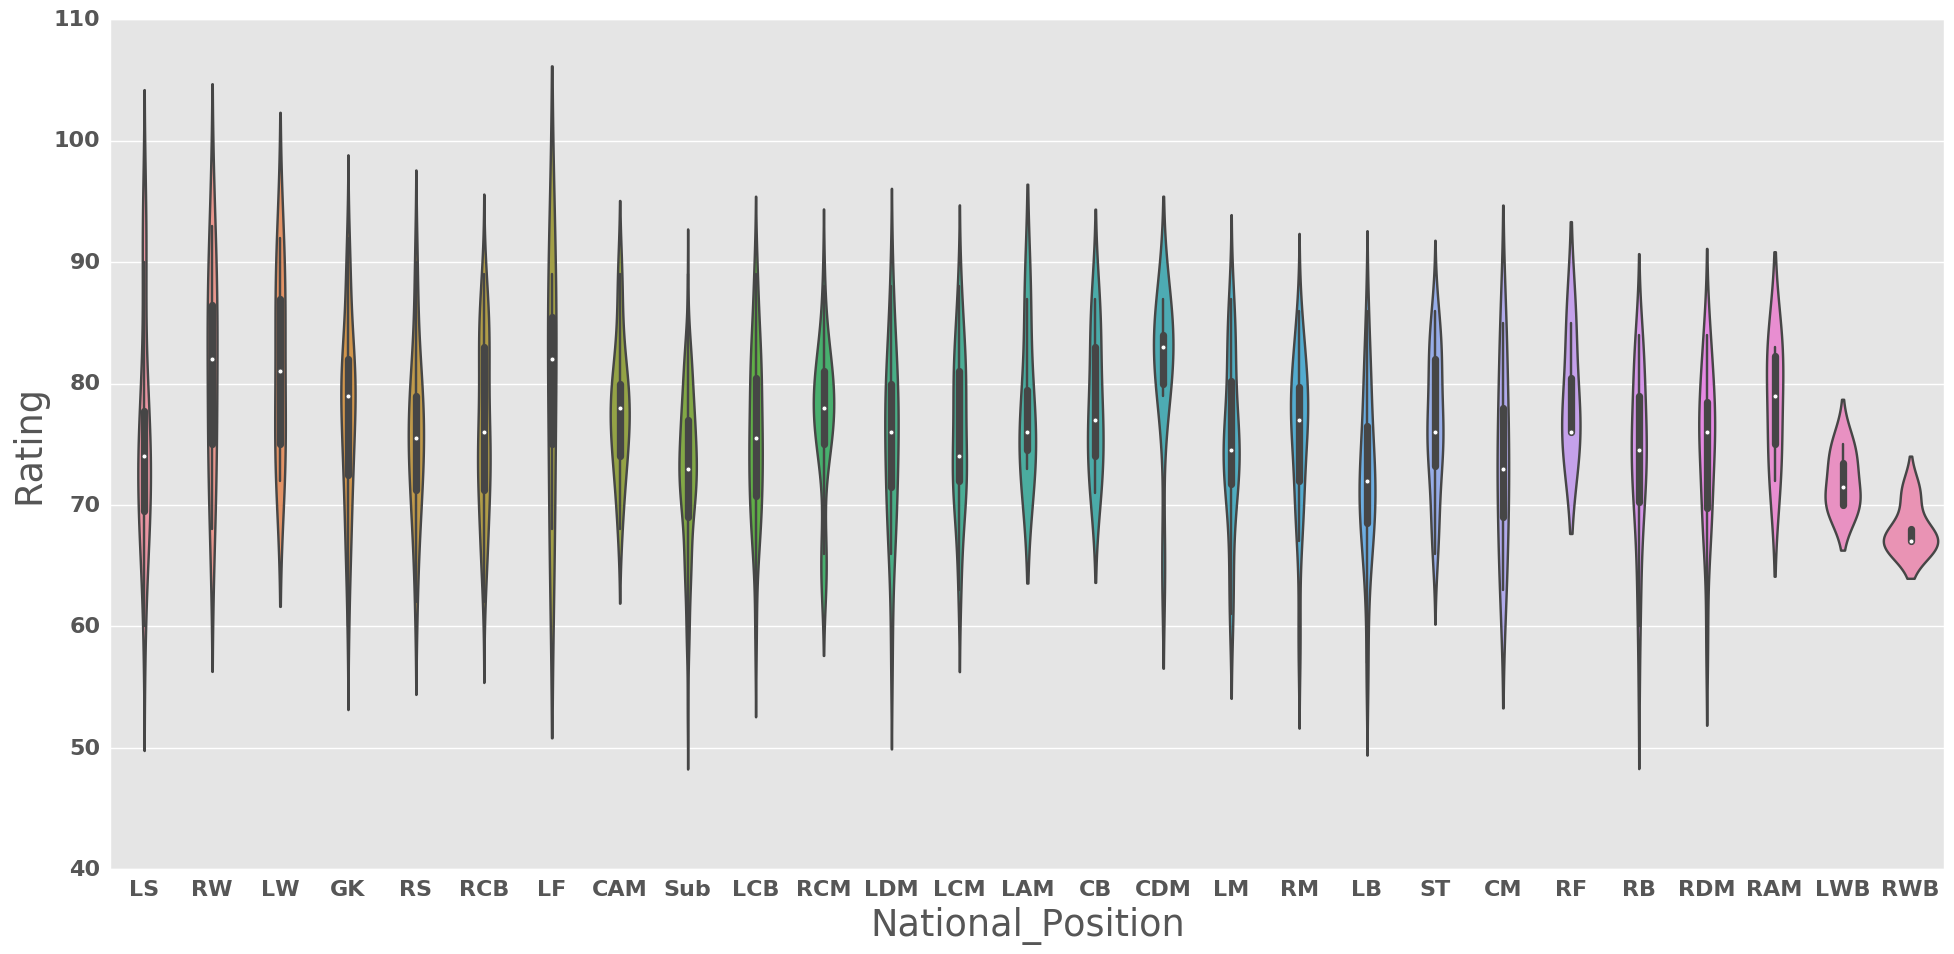

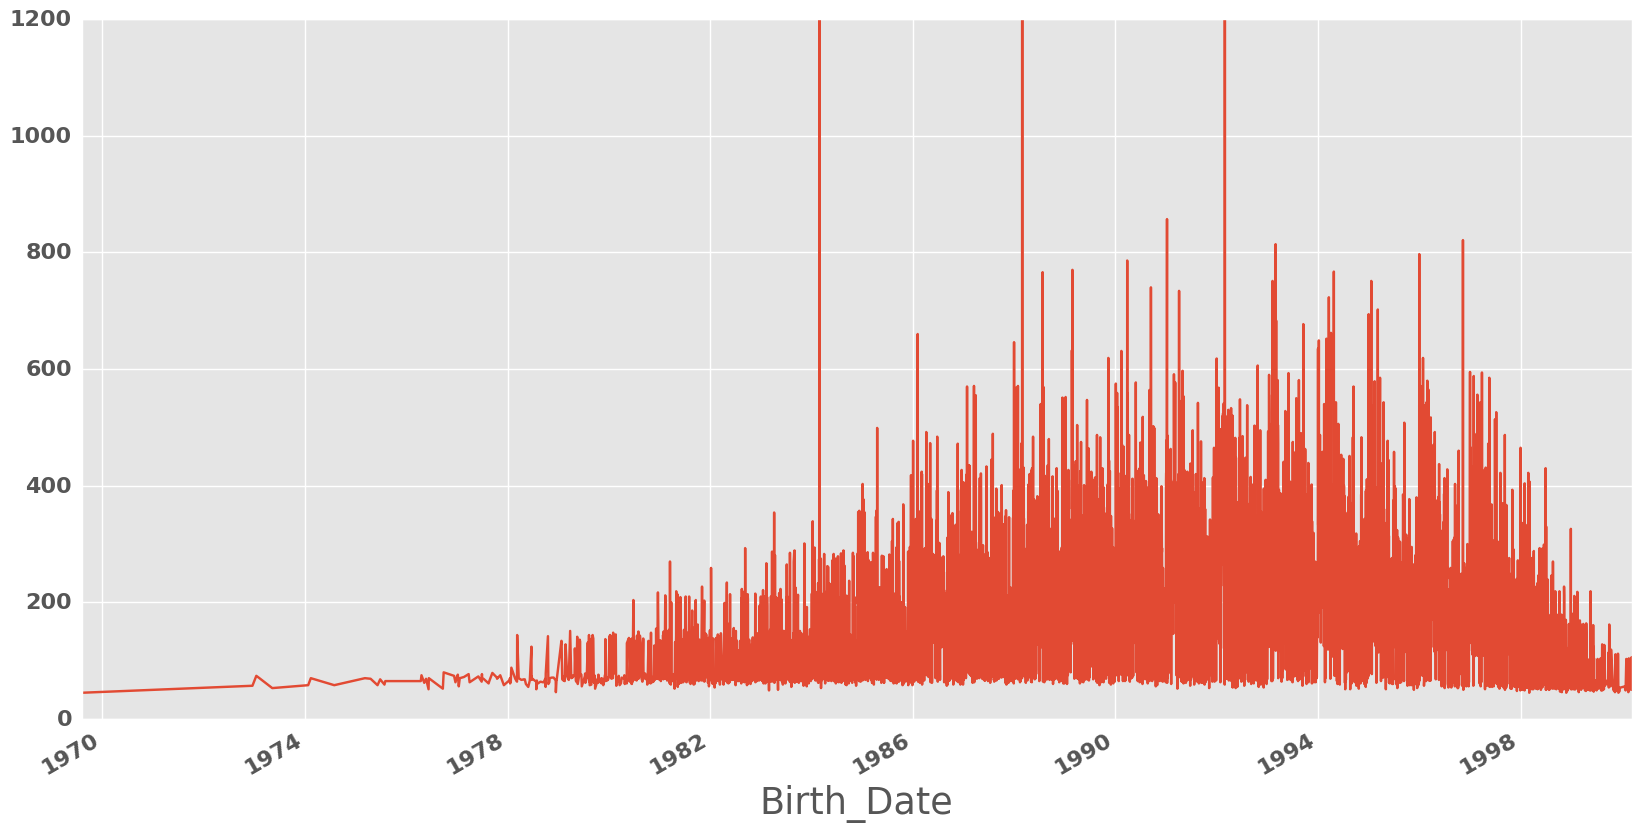

In [394]:
plt.figure(figsize = (20,10))
sns.violinplot(x="National_Position",y = "Rating", data = df)
plt.tight_layout()
plt.show()

plt.figure(figsize = (20,10))
ax = plt.gca()
df.groupby(["Birth_Date"]).sum()["Rating"].plot()
ax.set_ylim([0, 1200])
plt.show()


In [382]:
df.groupby(["Birth_Date"]).sum()["Rating"].sort_values(ascending = False)

Birth_Date
1988-02-29    10930
1984-02-29    10748
1992-02-29    10710
1991-01-08      857
1996-11-11      821
1993-03-01      814
1996-01-01      797
1990-03-27      786
1989-02-25      770
1994-04-25      767
1988-07-25      766
1995-01-20      751
1993-02-07      751
1990-09-14      740
1991-04-05      734
1994-03-20      723
1995-03-08      702
1995-01-01      694
1993-03-05      683
1993-09-17      677
1994-04-04      662
1986-02-05      660
1994-03-03      652
1994-01-07      649
1988-01-01      646
1994-01-01      635
1989-02-21      632
1990-02-13      631
1989-11-11      619
1996-01-28      619
              ...  
1995-11-23       50
1996-11-14       50
1998-01-29       49
1983-03-01       49
1999-08-13       49
1999-08-05       49
1999-07-02       49
1999-05-23       49
1999-05-14       49
1999-04-10       49
1998-12-06       49
2000-01-28       49
1997-12-30       49
1999-11-03       49
1999-04-17       48
1999-12-16       48
1999-11-22       48
1999-06-10       48
1997-12-0

A very interesting and suspicious trend, there are 3 dates corresponding to the extra day in February every leap year which seem to have an extremely large amount of good soccer players born on.

### Relevance of Qualitative Features to Rating

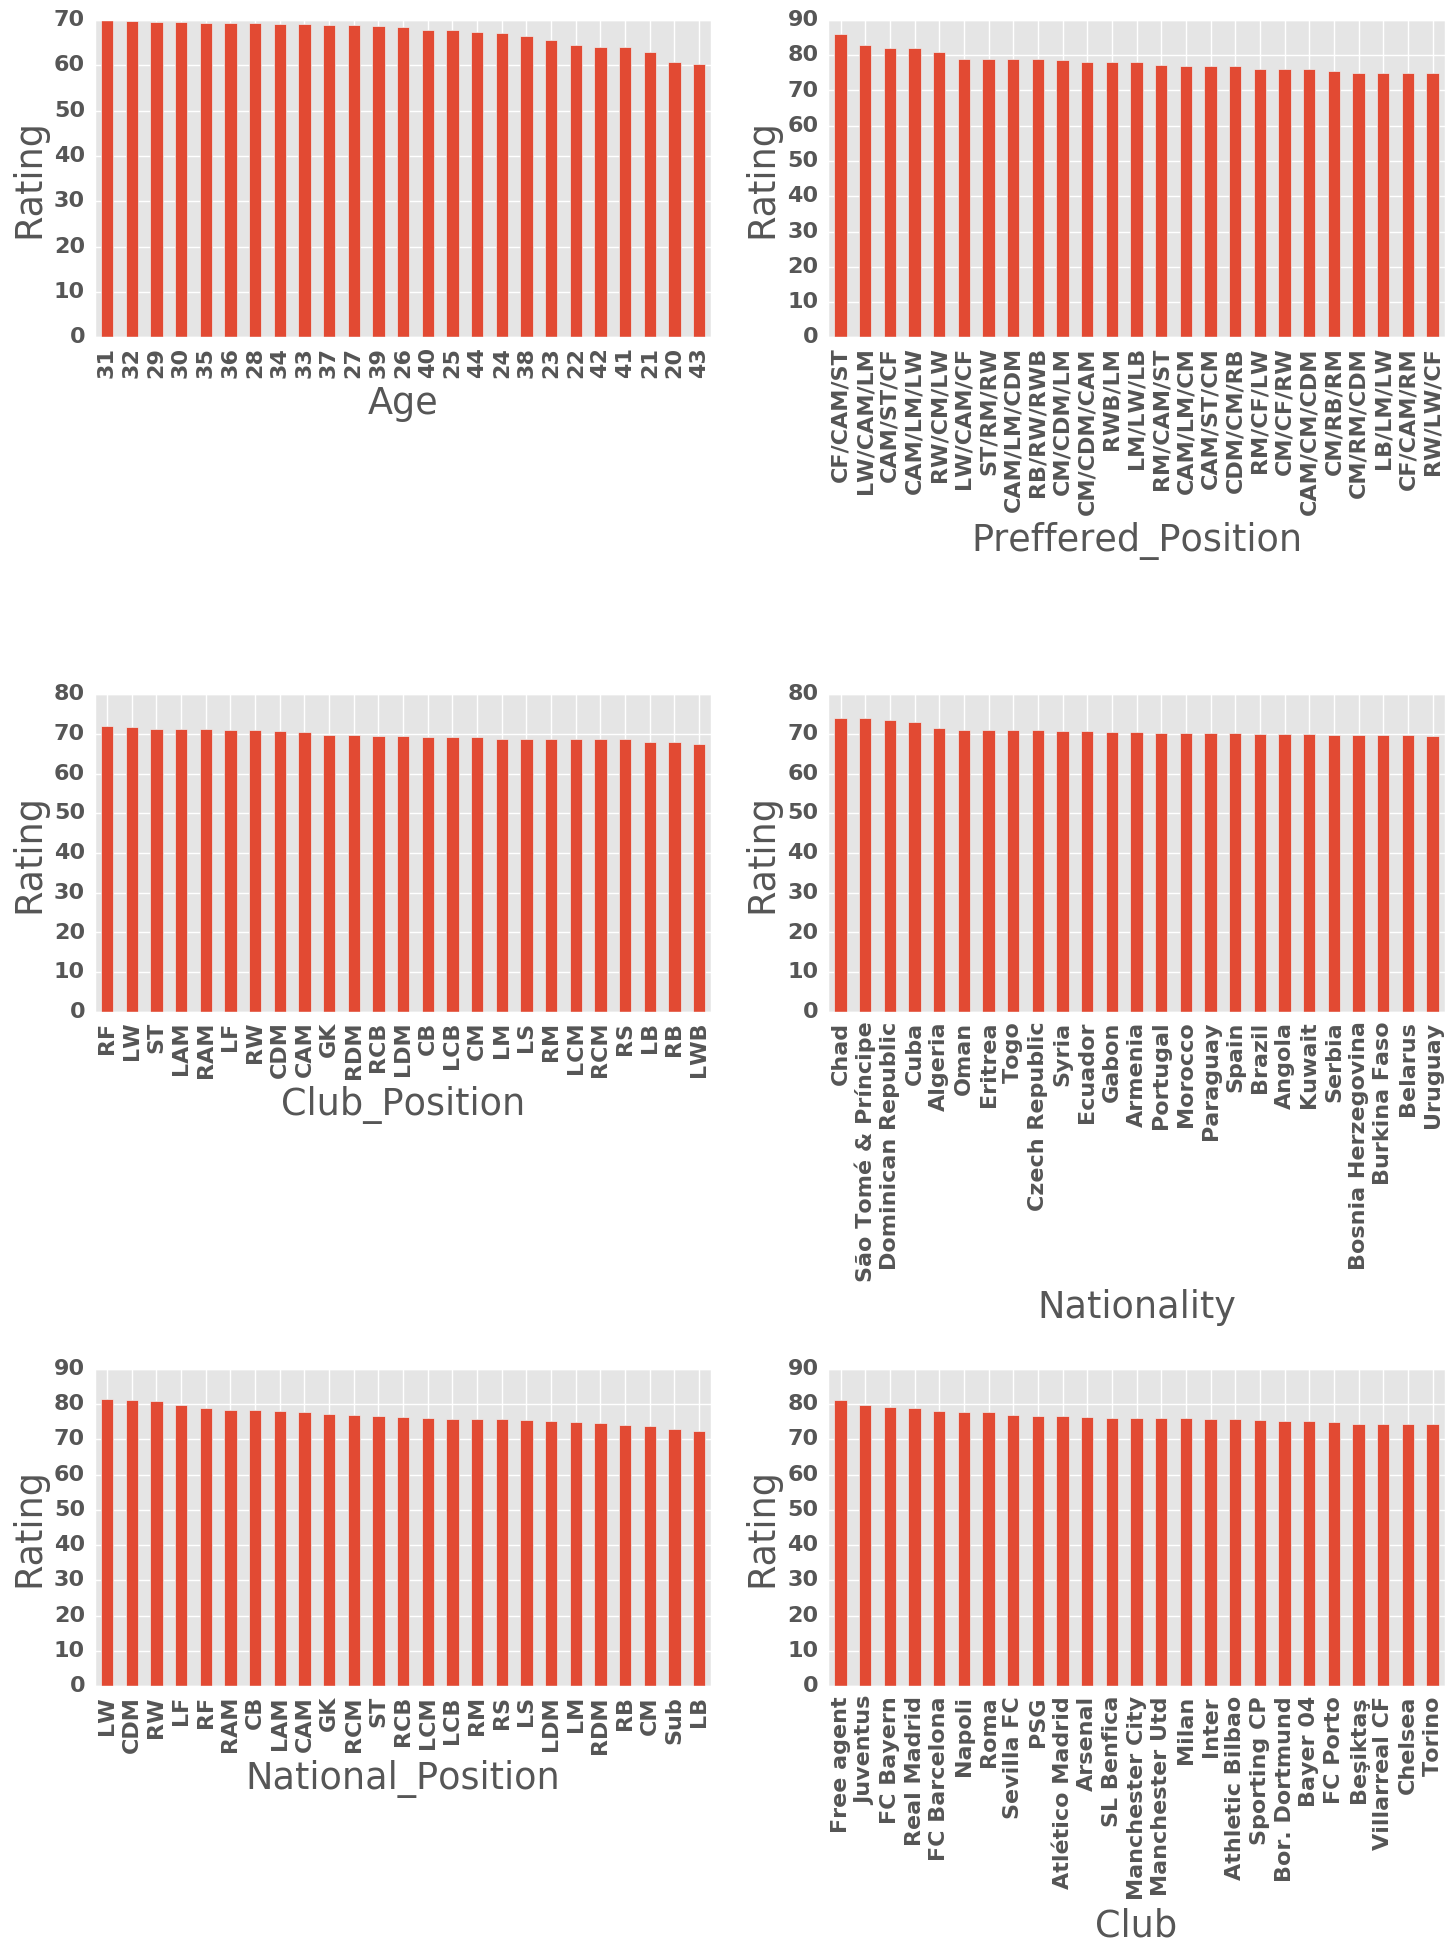

In [398]:
target_vals = ["Age", "Preffered_Position", "Club_Position", "Nationality",
              "National_Position","Club"]
fig = plt.figure(figsize = (15,20))

for i, feature in enumerate(target_vals):
    ax = fig.add_subplot(3,2,i+1)
    df.groupby([feature]).mean()["Rating"].sort_values(ascending=False)[0:25].plot(kind="bar")
    ax.set_ylabel("Rating")
    
plt.tight_layout()
plt.show()

### Quant Features against Rating

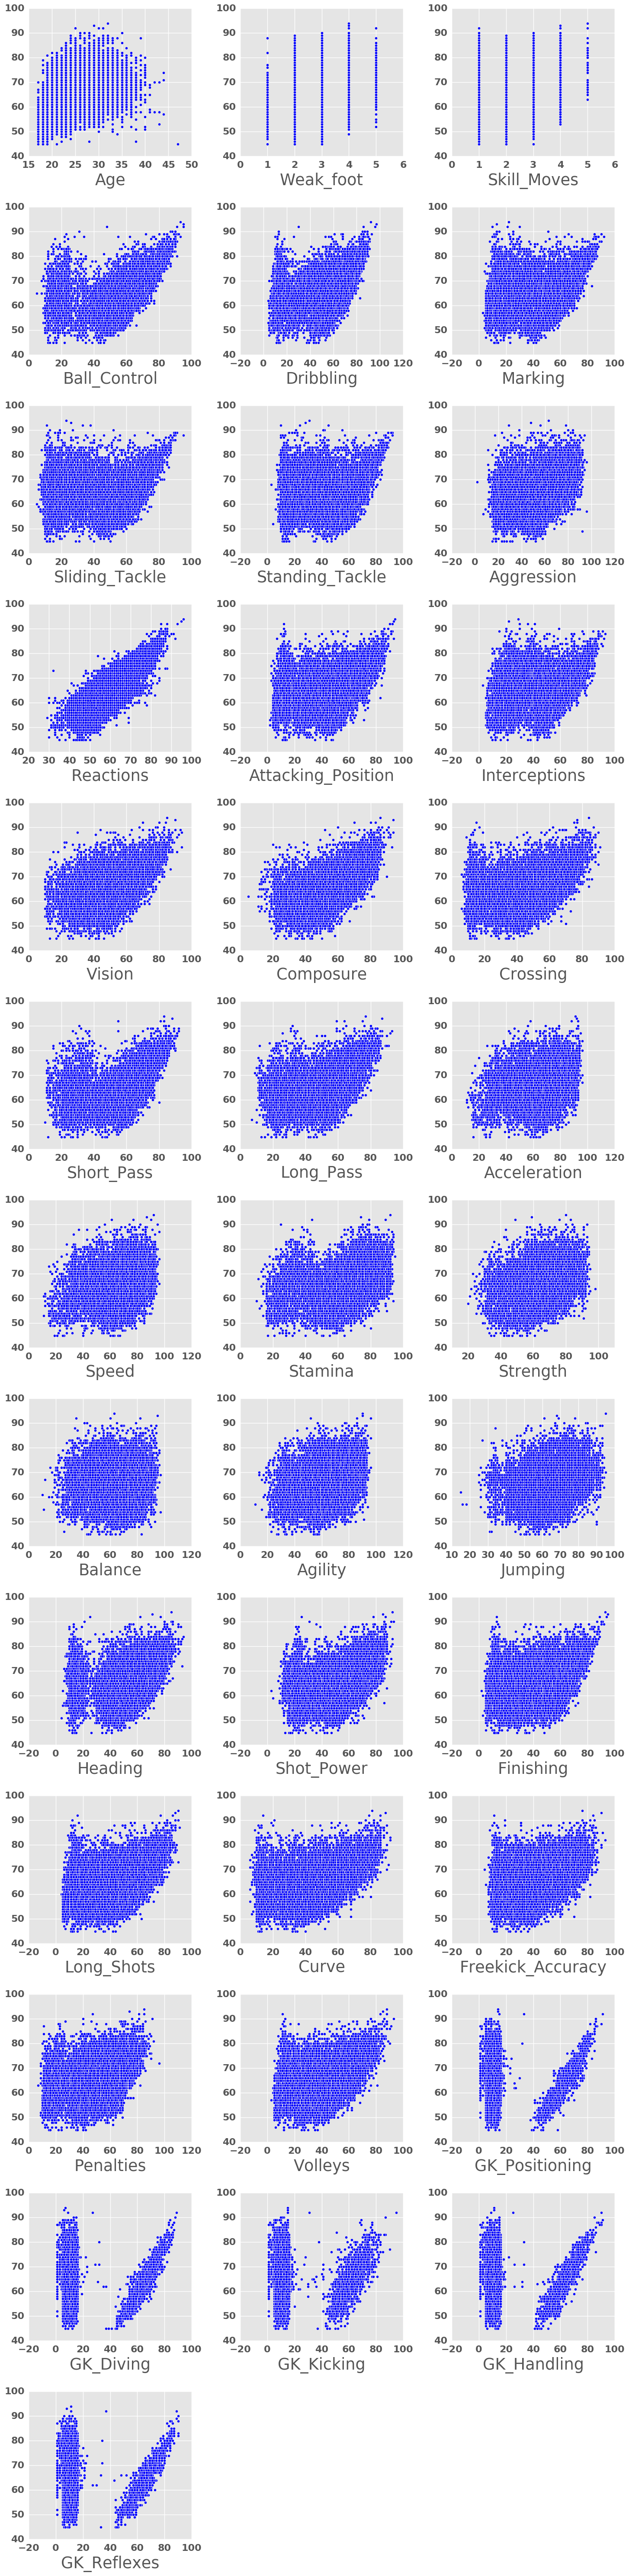

In [400]:
fig = plt.figure(figsize = (15,60))
for idx in range(37):
    feature = df_vals.columns[idx]
    ax = fig.add_subplot(13,3,idx+1)
    Xtmp = df_vals[feature]
    ax.scatter(Xtmp, y)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

## Prediction of a Player's Rating

In [335]:
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso, LinearRegression

X = df_vals.values
X = scale(X)
y = rating.values.ravel()

C:\Users\Clint_PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### Feature Selection
Given that we have about 35-40 different features to play around with, we can attempt to run some feature selection algorithms to reduce the size of our featureset.

In [336]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 10)
rfe_fit = rfe.fit(X, y)

for feat in df_vals.columns[rfe_fit.support_]:
    print(feat)

Skill_Moves
Ball_Control
Standing_Tackle
Reactions
Short_Pass
Heading
GK_Positioning
GK_Diving
GK_Handling
GK_Reflexes


Given the above feature selection, lets now have a look at some pairplots to see how they all relate.

C:\Users\Clint_PC\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Clint_PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


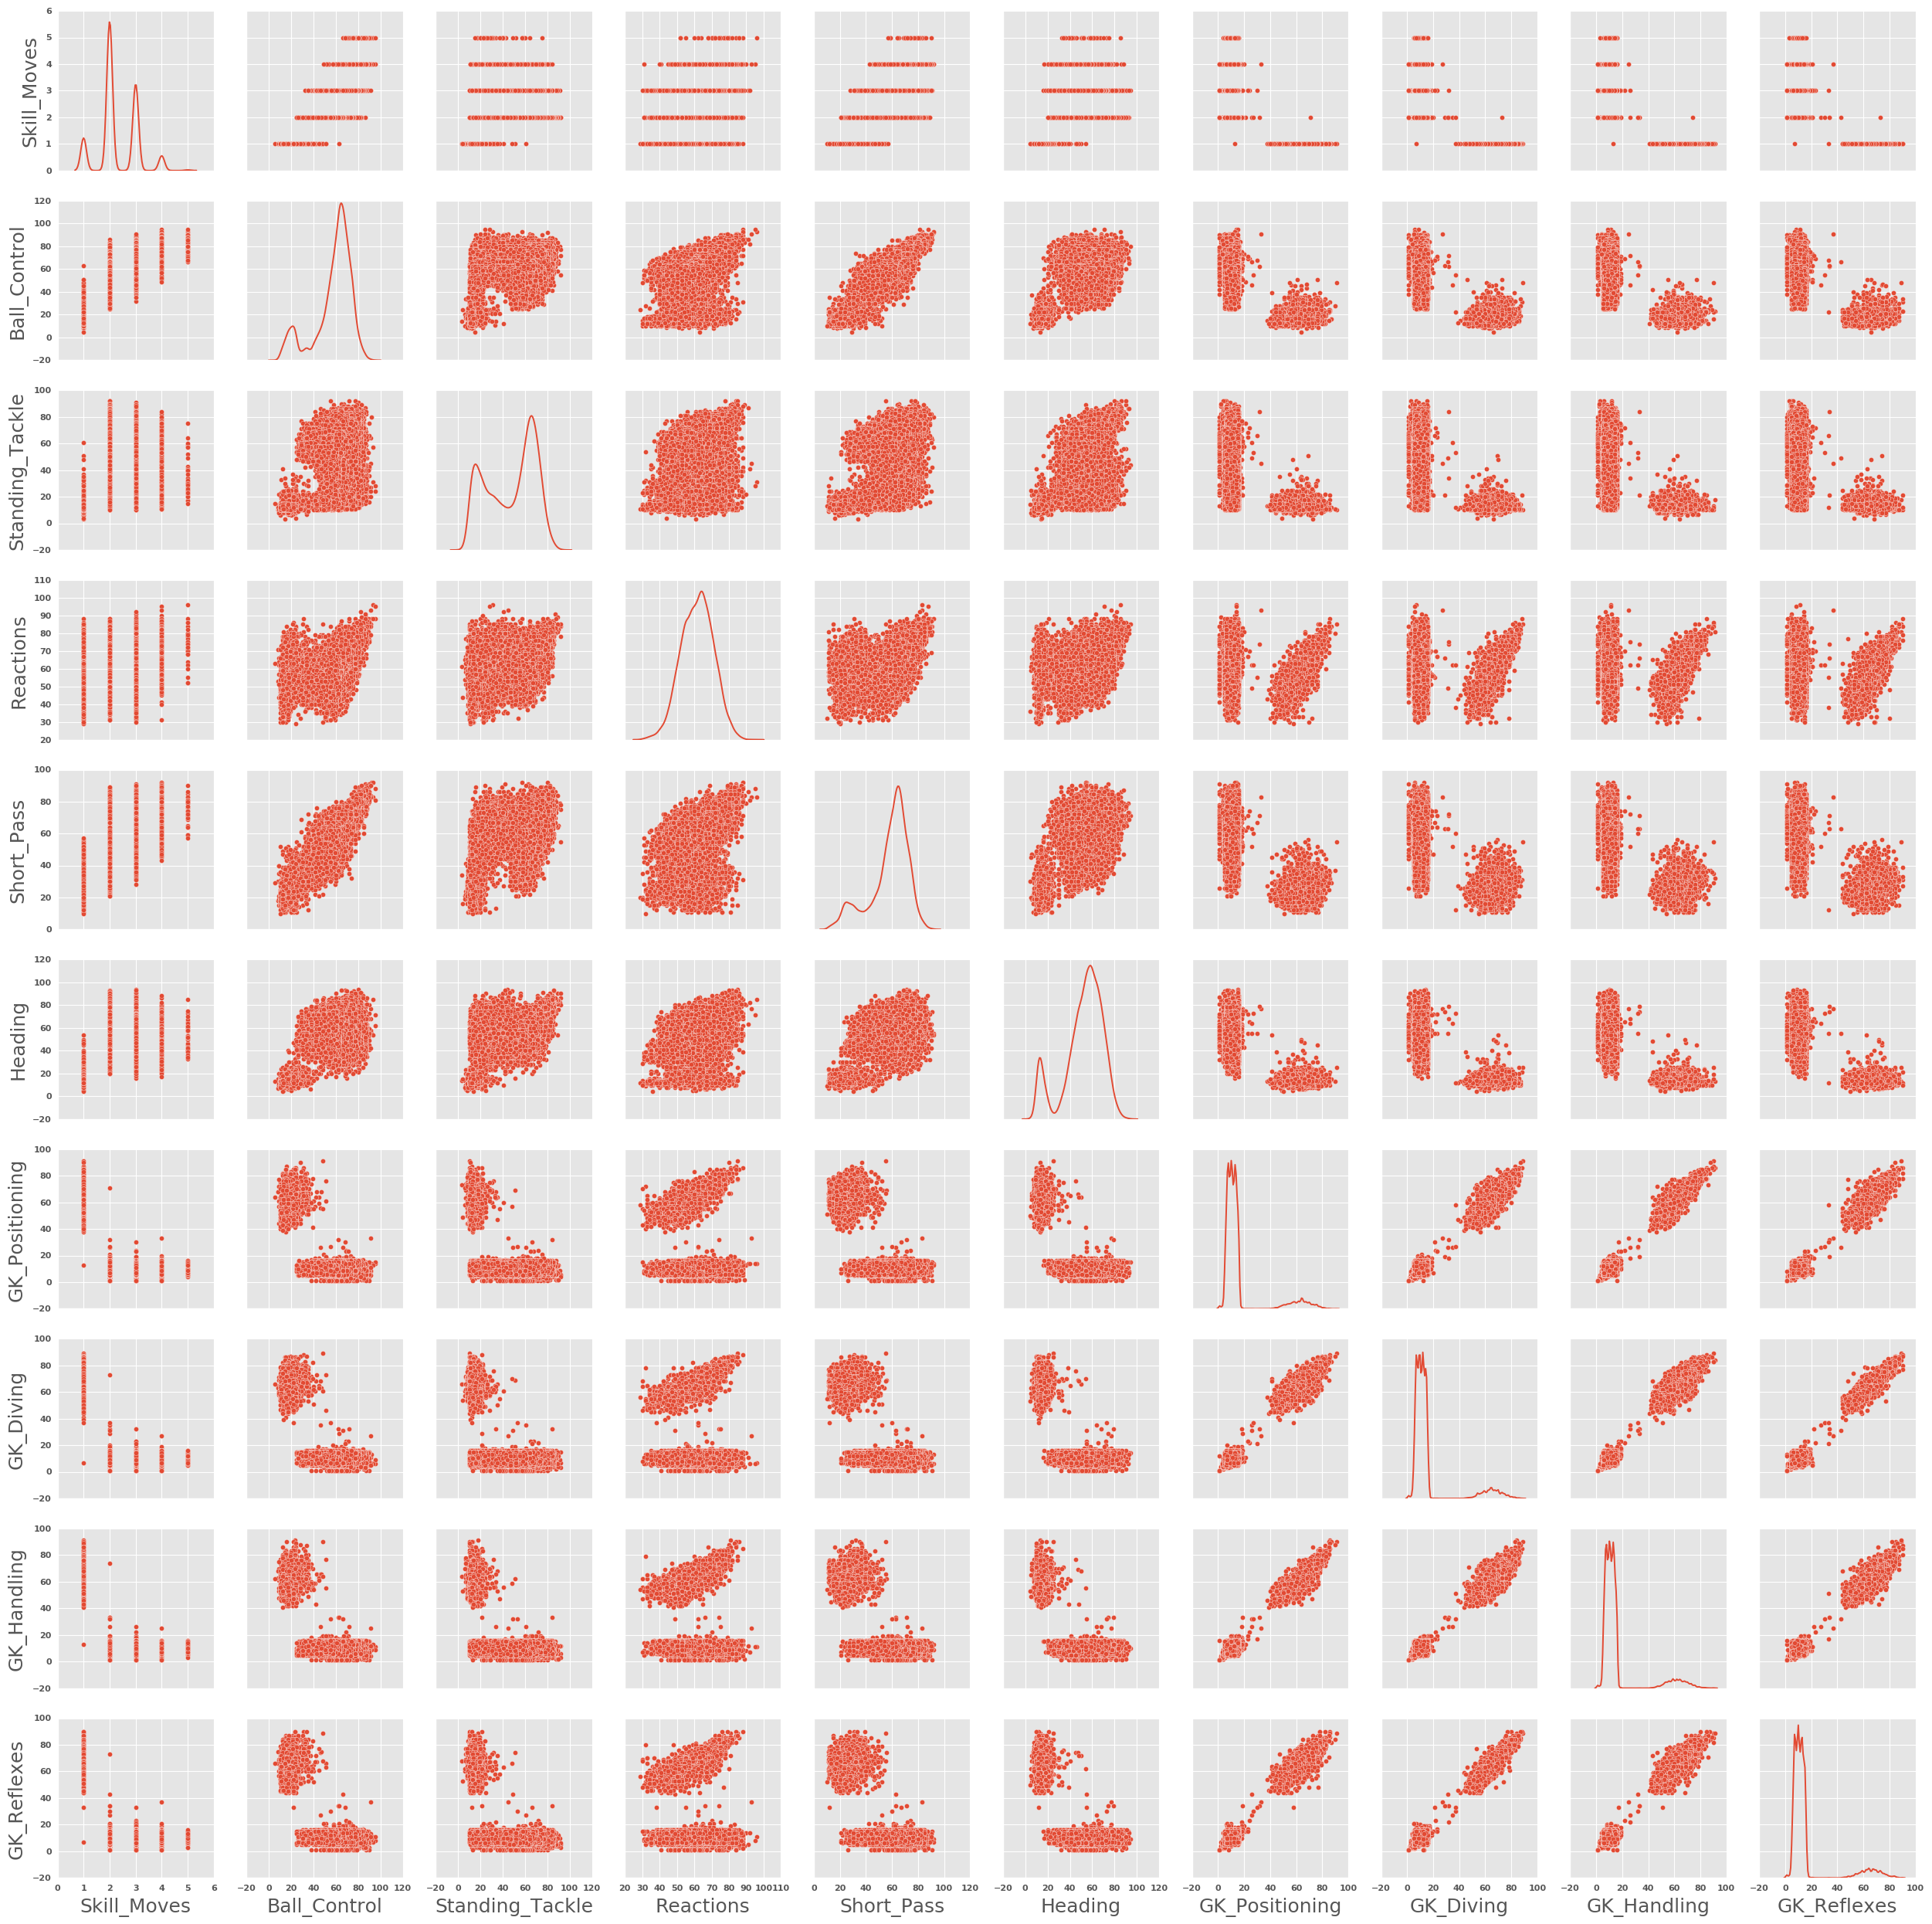

In [411]:
sns.pairplot(df.loc[:,df_vals.columns[rfe_fit.support_].values], diag_kind = "kde")
plt.show()

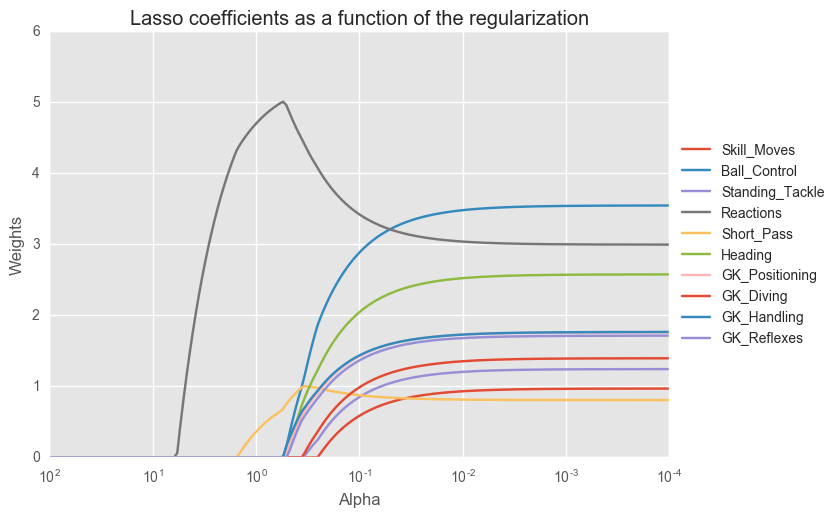

In [339]:
X_reduced = X[:,rfe_fit.support_]
test_feats = df_vals.loc[:, rfe_fit.support_]
n = 200
alphas = np.logspace(-4, 2, n)

clf = Lasso(fit_intercept=False)

coefs = np.zeros((X_reduced.shape[1],alphas.size))
for i, a in enumerate(alphas):
    clf.set_params(alpha=a)
    clf.fit(X_reduced, y)
    c = clf.coef_
    coefs[:, i] = c

ax = plt.gca()

ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Lasso coefficients as a function of the regularization')

ax.legend(test_feats.columns.values,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

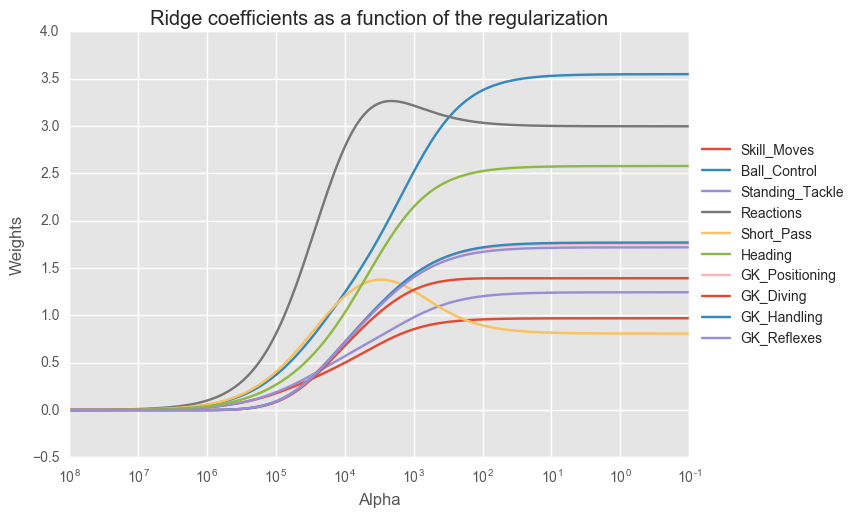

In [340]:
n = 200
alphas = np.logspace(-1, 8, n)

clf = Ridge(fit_intercept=False)

coefs = np.zeros((X_reduced.shape[1],alphas.size))
for i, a in enumerate(alphas):
    clf.set_params(alpha=a)
    clf.fit(X_reduced, y)
    c = clf.coef_
    coefs[:, i] = c
    
ax = plt.gca()

ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Ridge coefficients as a function of the regularization')
ax.legend(test_feats.columns.values, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Analysis of Classification/Regression Methods

Given our above investigation into what drives the rating of a player, we can now build out some algorithms which can help us predict a rating. There are two approaches we can take:
1. Treat each rating as a class, and thus we have a classification problem
2. Treat the rating as a continuous variable, and thus we have a regression problem

I thought it'd be interesting to explore both and compare the results. We'll use a brute-force approach where we loop through some common machine learning algorithms in the sklearn package, and then have a brief look at a Keras model.

C:\Users\Clint_PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


################################################################################
Fitting 'KNN' regressor.
Name: KNN Score: 0.89 Time 0.0430 secs
################################################################################
Fitting 'Linear SVM' regressor.
Name: Linear SVM Score: 0.80 Time 6.9366 secs
################################################################################
Fitting 'RBF SVM' regressor.
Name: RBF SVM Score: -0.07 Time 40.6853 secs
################################################################################
Fitting 'Bagging Classifier' regressor.
Name: Bagging Classifier Score: 0.91 Time 0.1496 secs
################################################################################
Fitting 'Decision Tree' regressor.
Name: Decision Tree Score: 0.80 Time 0.0941 secs
################################################################################
Fitting 'Random Forest' regressor.
Name: Random Forest Score: 0.69 Time 0.0410 secs
####################################

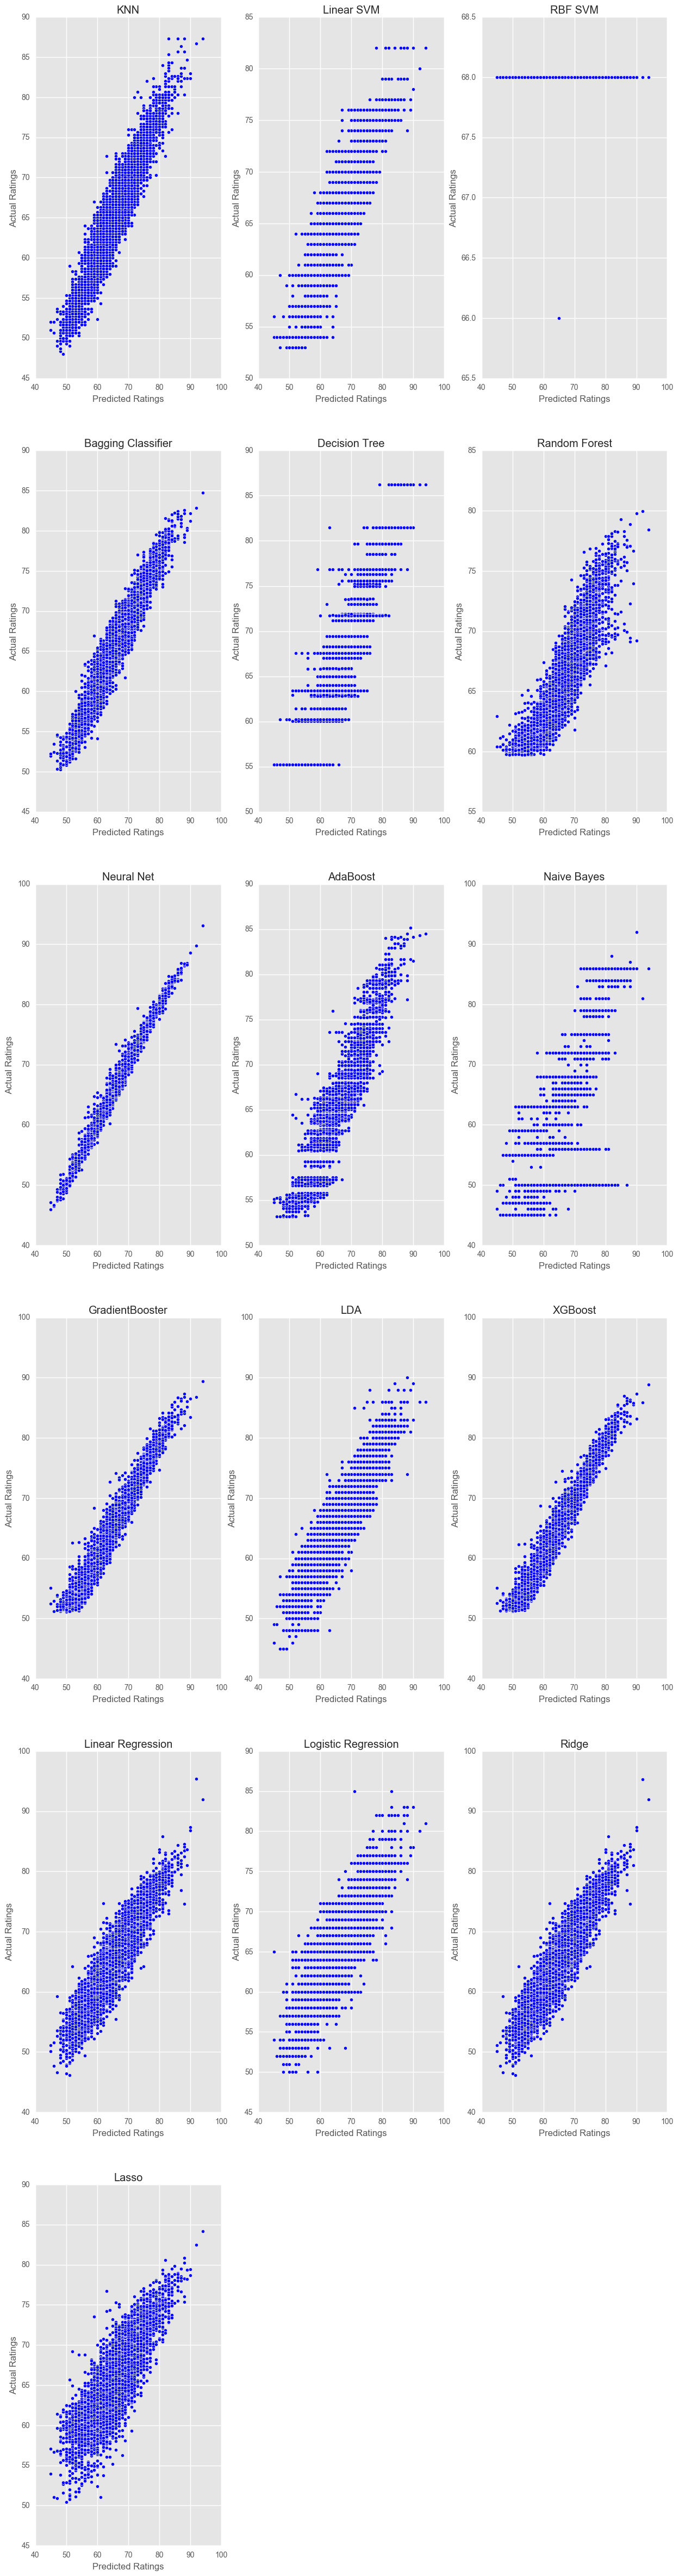

In [341]:
# Import classifiers
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Ridge, LinearRegression, Lasso, LogisticRegression
from xgboost import XGBRegressor

#Import helper functions
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import r2_score

import time

# Function to help with repeated plotting of predictions
def pred_plotter(X_test, y_test, model, model_name = ""):
    preds = model.predict(X_test)
    plt.scatter(y_test, preds)
    plt.xlabel("Predicted Ratings")
    plt.ylabel("Actual Ratings")
    plt.title(model_name)

# Names of classifiers we want to use
clf_names = ["KNN",
             "Linear SVM",
             "RBF SVM",
             "Bagging Classifier",
             "Decision Tree", 
             "Random Forest", 
             "Neural Net", 
             "AdaBoost",
             "Naive Bayes", 
             "GradientBooster", 
             "LDA",
             "XGBoost", 
             "Linear Regression",
             "Logistic Regression",
             "Ridge", 
             "Lasso"
            ]

# Implementation of each classifier we want to use, large scope in here for parameter tuning etc.
clfs = [KNeighborsRegressor(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        BaggingRegressor(KNeighborsRegressor(), max_samples=0.5, max_features=0.5),
        DecisionTreeRegressor(max_depth=5),
        RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
        MLPRegressor(alpha=1),
        AdaBoostRegressor(),
        GaussianNB(),
        GradientBoostingRegressor(),
        LinearDiscriminantAnalysis(),
        XGBRegressor(),
        LinearRegression(),
        LogisticRegression(), 
        Ridge(alpha = 1.0,fit_intercept=True),
        Lasso(alpha = 1.0, fit_intercept=True)
       ]

# Create test/train splits, and initialise plotting requirements
# We won't apply on feature reduction here, but it can be explored.

X = df_vals.values 
X = scale(X)
y = rating.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
regressor_data = pd.DataFrame(columns = ["Name", "Score", "Training_Time"])
fig = plt.figure(figsize = (15,60))
i = 0

# Iterate over each regressor (no cross validation/KFolds yet)
for name, clf in zip(clf_names, clfs):
    print("#" * 80)
    print("Fitting '%s' regressor." % name)
    
    # Time required to fit the regressor
    t0 = time.time()
    clf.fit(X_train, y_train)
    t1 = time.time()

    preds = clf.predict(X_test)
    score = r2_score(y_test, preds)
    print("Name: %s Score: %.2f Time %.4f secs" % (name, score, t1-t0))
    
    # Create a plot showing predictions against actual
    ax = fig.add_subplot(6,3,i+1)
    pred_plotter(X_test, y_test, clf, name)
    
    # Store results
    regressor_data.loc[i] = [name, score, t1-t0]
    i += 1
plt.show()


Given the above results, we can then sort and see that the multi-layer perceptron neural net and our ensemble methods have come out on top. It's likely that there is some overfitting occuring in the Neural Net due to us using all 37 features, as opposed to some reduction.

In [342]:
regressor_data.sort_values(by="Score", ascending = False)

Name     Score  Training_Time
6            Neural Net  0.985265      13.676635
11              XGBoost  0.947936       0.509756
9       GradientBooster  0.947867       1.972613
3    Bagging Classifier  0.913443       0.149629
0                   KNN  0.894903       0.043041
7              AdaBoost  0.846538       2.168065
14                Ridge  0.843833       0.009017
12    Linear Regression  0.843832       0.016016
10                  LDA  0.813427       0.047045
4         Decision Tree  0.800176       0.094089
1            Linear SVM  0.800060       6.936606
15                Lasso  0.692266       0.011011
5         Random Forest  0.691135       0.041039
13  Logistic Regression  0.682681      15.893164
8           Naive Bayes  0.085124       0.024023
2               RBF SVM -0.065493      40.685251

As an example of how we can use ensembling to improve results, we can implement the BaggingRegressor method for a Random Forest. The sklearn BaggingRegressor() uses the DecisionTreeRegressor as a default.

Bagging RF Score:  0.956520178331


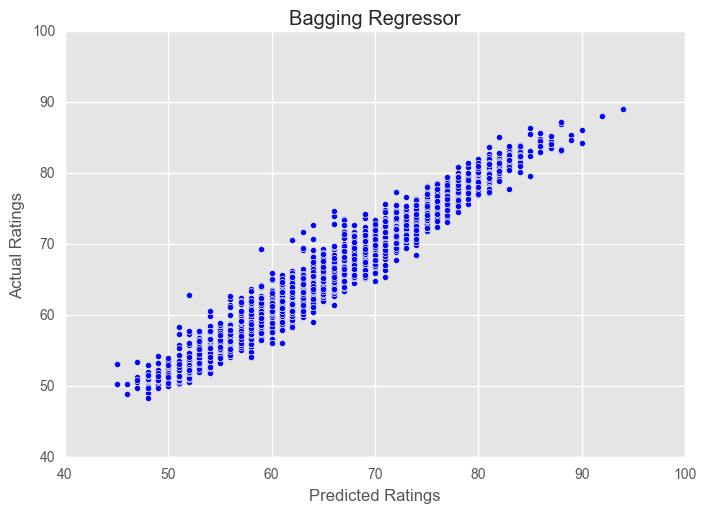

In [343]:
from sklearn.ensemble import BaggingRegressor

eclf1= BaggingRegressor(RandomForestRegressor(),n_estimators = 20)

eclf1.fit(X_train, y_train)
score = r2_score(y_test, eclf1.predict(X_test))
print("Bagging RF Score: ", score)
pred_plotter(X_test, y_test, eclf1, "Bagging Regressor")
plt.show()

################################################################################
Fitting 'KNN' classifier.
Name: KNN Score: 0.75 Time 0.0510 secs
################################################################################
Fitting 'Bagging Classifier' classifier.
Name: Bagging Classifier Score: 0.84 Time 0.1468 secs
################################################################################
Fitting 'Decision Tree' classifier.
Name: Decision Tree Score: 0.79 Time 0.0786 secs
################################################################################
Fitting 'Random Forest' classifier.
Name: Random Forest Score: 0.69 Time 0.0571 secs
################################################################################
Fitting 'Neural Net' classifier.
Name: Neural Net Score: 0.90 Time 15.2892 secs
################################################################################
Fitting 'AdaBoost' classifier.
Name: AdaBoost Score: 0.47 Time 1.9008 secs
#############################

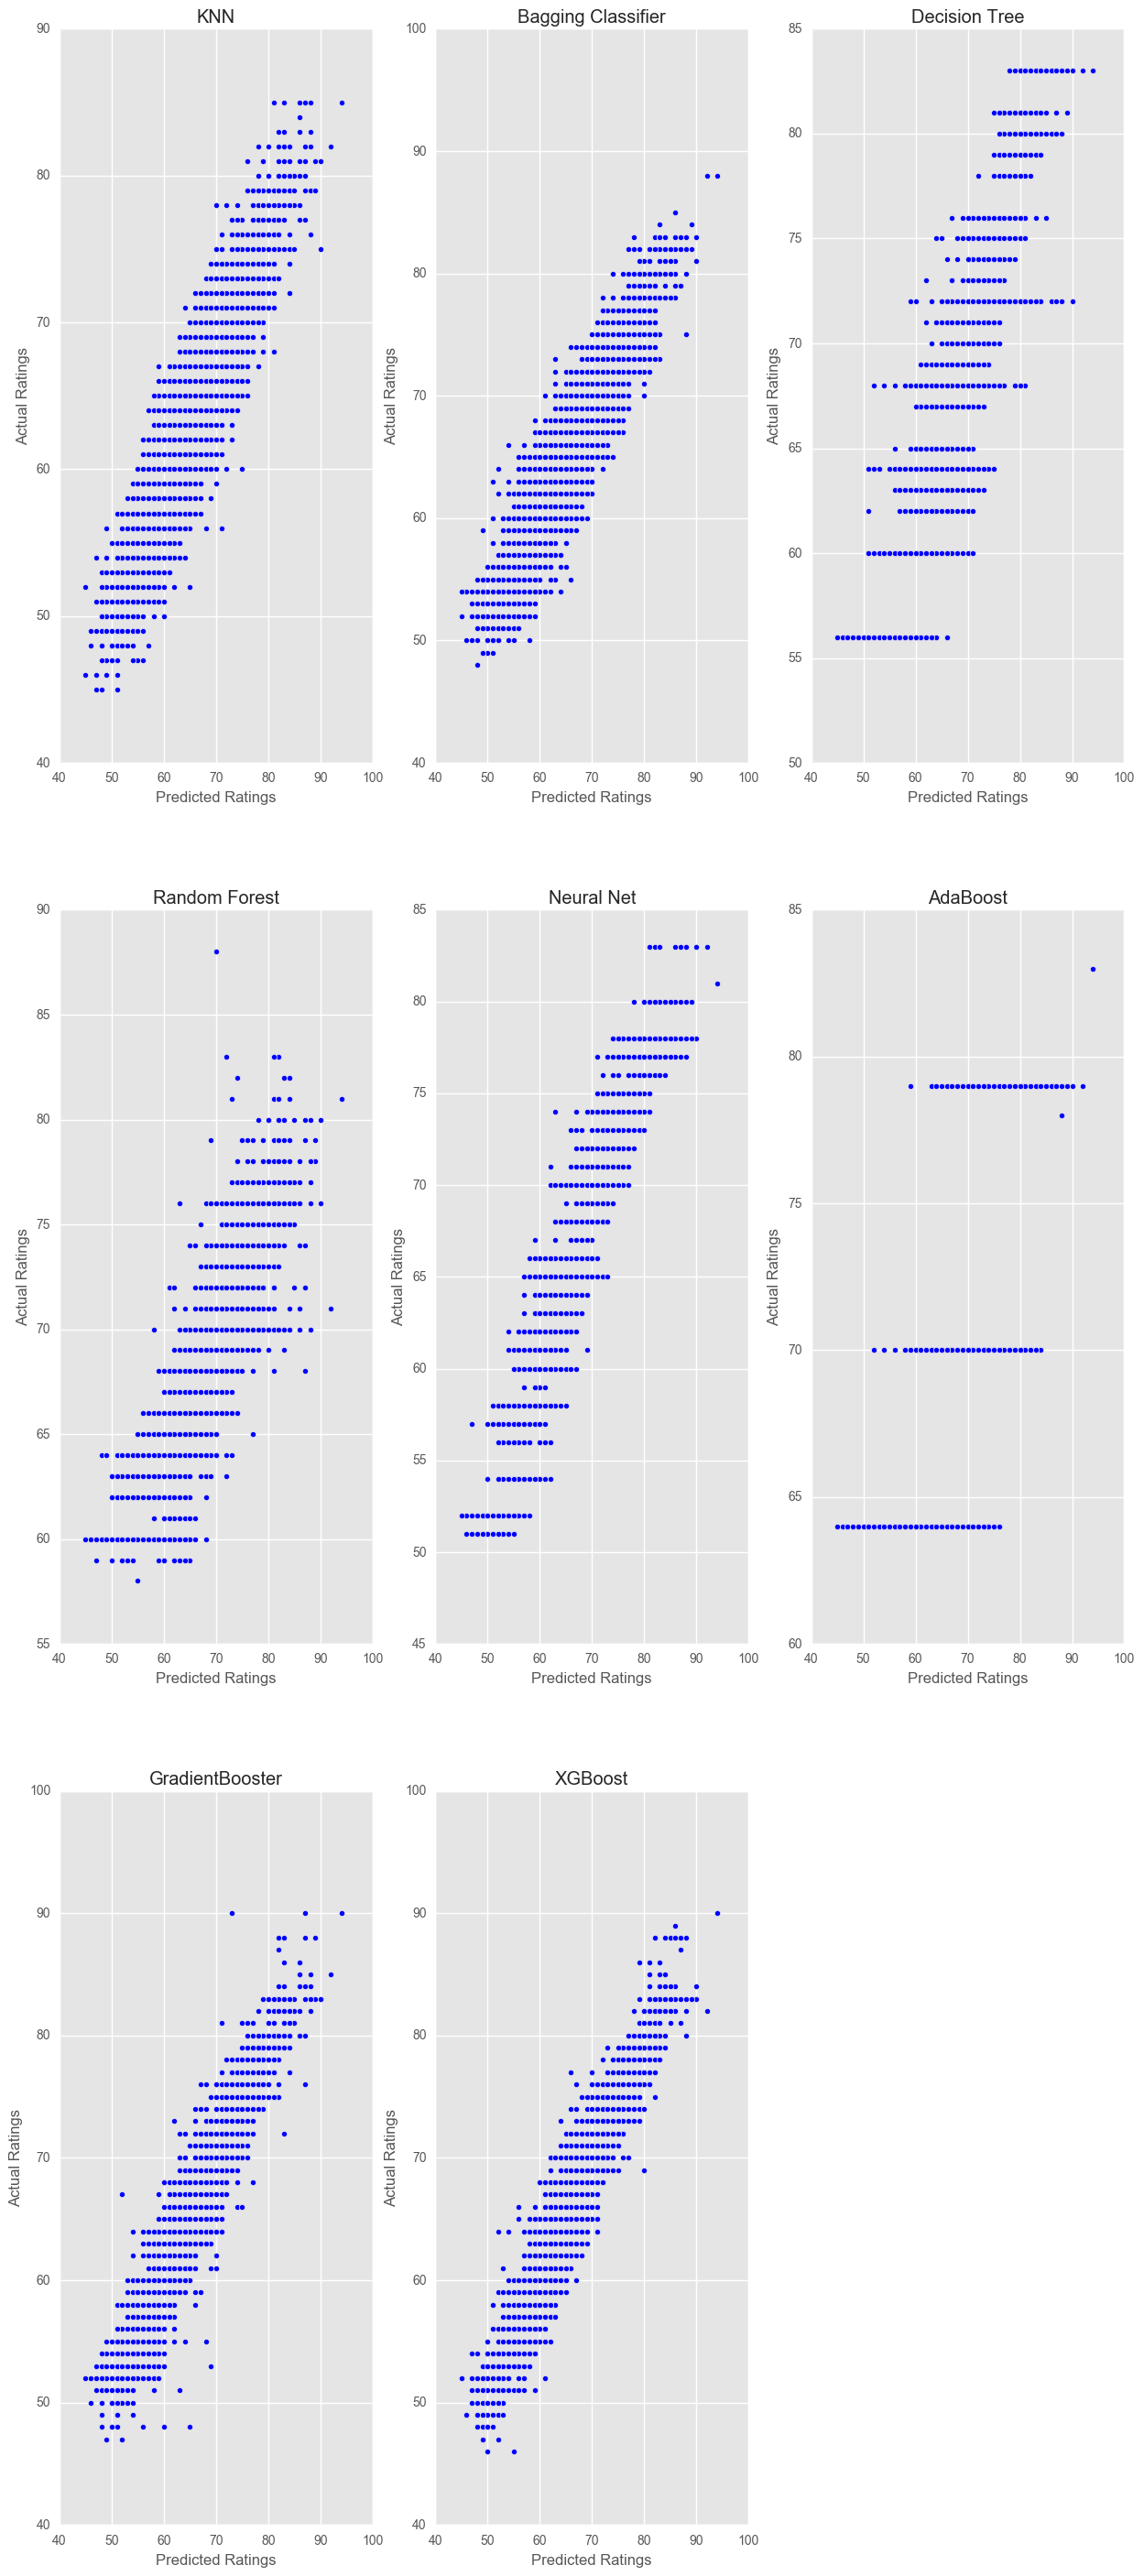

In [344]:
# Import classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

# Name of classifiers
clf_names = ["KNN",
             "Bagging Classifier",
             "Decision Tree", 
             "Random Forest", 
             "Neural Net", 
             "AdaBoost",
             "GradientBooster", 
             "XGBoost", 
            ]

# Classifier implementation
clfs = [KNeighborsClassifier(3),
        BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        XGBClassifier(),
       ]

# Create test/train splits, and initialise plotting requirements
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
classifier_data = pd.DataFrame(columns = ["Name", "Score", "Training_Time"])
fig = plt.figure(figsize = (15,60))
i = 0

# Iterate over each classifier (no cross validation/KFolds yet)
for name, clf in zip(clf_names, clfs):
    print("#" * 80)
    print("Fitting '%s' classifier." % name)
    
    # Time to fit each classifier
    t0 = time.time()
    clf.fit(X_train, y_train)
    t1 = time.time()

    preds = clf.predict(X_test)
    score = r2_score(y_test, preds)
    print("Name: %s Score: %.2f Time %.4f secs" % (name, score, t1-t0))
    
    # Create a plot showing predictions against actual
    ax = fig.add_subplot(5,3,i+1)
    pred_plotter(X_test, y_test, clf, name)
    
    # Store results
    classifier_data.loc[i] = [name, score, t1-t0]
    i += 1
plt.show()


Our goal here was to compare the implementation of regression algorithms against classification algorithms, for a problem which can be solved by both (classification of players in ratings). We see that the regressors have outperformed the classifiers quite a bit, both in score and time to run.

In [345]:
classifier_data.sort_values(by="Score", ascending = False)

Name     Score  Training_Time
7             XGBoost  0.915084      20.749167
6     GradientBooster  0.904527     142.410964
4          Neural Net  0.899193      15.289229
1  Bagging Classifier  0.839944       0.146844
2       Decision Tree  0.788160       0.078576
0                 KNN  0.753155       0.051048
3       Random Forest  0.689175       0.057054
5            AdaBoost  0.467350       1.900753

Let's see if we can get any improvements by using a VotingClassifier. This is a basic implementation of ensemble stacking, which is a powerful tool (particularly in Kaggle competitions).

Voting Classifier Score:  0.915817762245


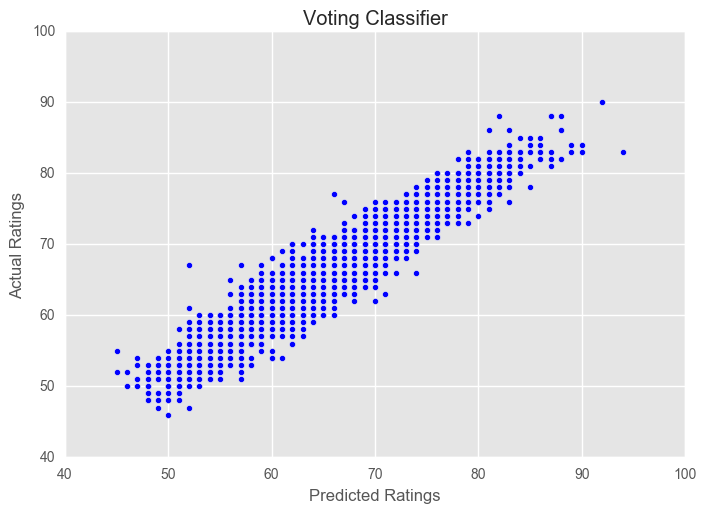

In [346]:
from sklearn.ensemble import VotingClassifier
clf1 = XGBClassifier()
clf2 = AdaBoostClassifier()
clf3 = BaggingClassifier()

eclf1 = VotingClassifier(estimators = [
    ('xgb',clf1), ('ada', clf2), ('bag', clf3)], voting = 'soft')

eclf1.fit(X_train, y_train)
score = r2_score(y_test, eclf1.predict(X_test))
print("Voting Classifier Score: ", score)
pred_plotter(X_test, y_test, eclf1, "Voting Classifier")
plt.show()

### Keras Implementation
We may as well run a Keras model whilst we're here, just for some extra practice.

C:\Users\Clint_PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


R^2: : 82.37%
R^2: : 83.23%
R^2: : 83.51%
R^2: : 85.05%
R^2: : 83.63%
R^2: : 83.81%
R^2: : 84.28%
R^2: : 83.96%
R^2: : 81.70%
R^2: : 77.31%


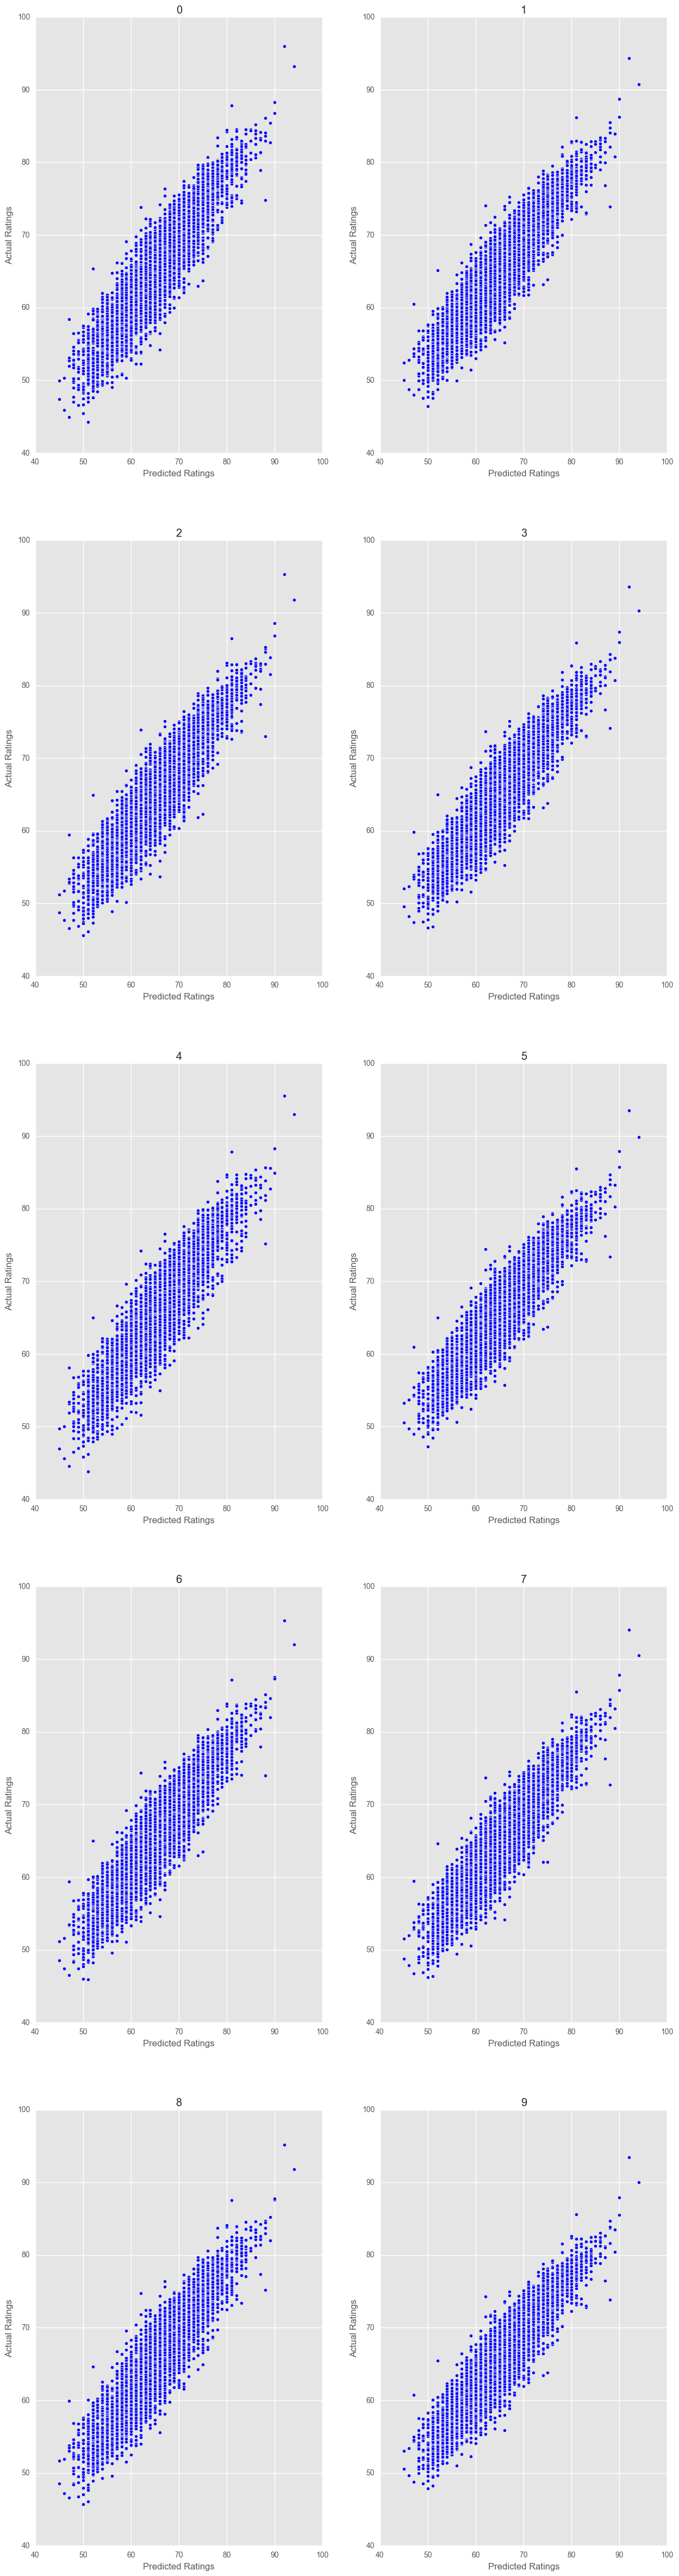

In [248]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10) # Kfold cross-validation
cvscores = [] # A store of cross-validation scores for each iteration of kfold
history = [] # A store of the keras history 
fig = plt.figure(figsize = (15,60))

for i, (train, test) in enumerate(kfold.split(X, y)):

  # Create sequential model which is basically a stack of linear neural layers.
    model = Sequential()
    model.add(Dense(200, input_dim=X.shape[1],activation='linear'))
    model.add(Dense(1))

    # Compile model using mean square error loss and Root Mean Square Propagation
    model.compile(loss = "mse", optimizer = "rmsprop", metrics = ["acc"])
    
    # Fit the model to training data
    history.append(model.fit(X[train], y[train], nb_epoch=200, batch_size=128, verbose=0))
    
    # Evaluate model against testing data
    preds = model.predict(X[test])
    scores = r2_score(y[test], preds)
    print("%s: %.2f%%" % ("R^2: ", scores*100))
    cvscores.append(scores*100)
    
    ax = fig.add_subplot(5,2,i+1)
    pred_plotter(X_test, y_test, model, i)
    
plt.show()

pred_plotter(X_test, y_test, model, "Keras Sequential Full")
plt.show()

Full Keras Model Score:  0.833404800615


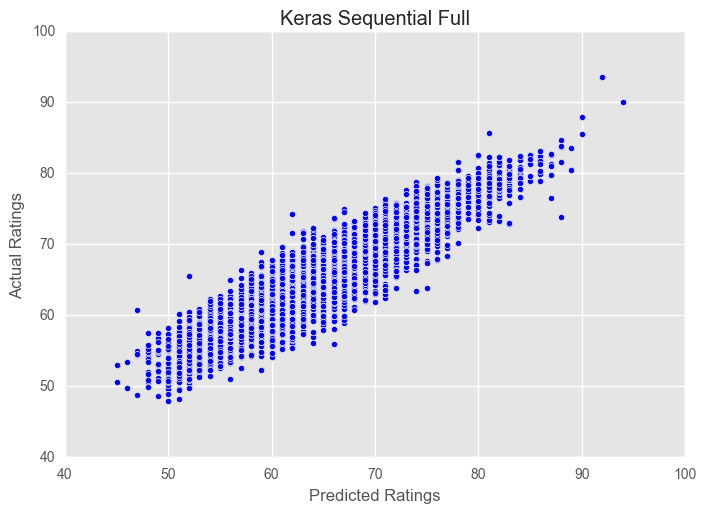

In [249]:
preds = model.predict(X_test)
score = r2_score(y_test, preds)
print("Full Keras Model Score: ", score)
pred_plotter(X_test, y_test, model, "Keras Sequential Full")
plt.show()

## Lessons
* Be careful with what scoring you use on your algorithms. You need to match the scoring to the type of problem you're attempting to solve. Here we had two possibilities, we could use a regression type analysis and try to regress our features onto a continuous rating scale. Alternatively, we could assume that each rating corresponds to a category, and thus attempt to classify each sample into a category. These are two fundamentally different problems, which have different metrics/definitions of accuracy, success etc. I was initially running with the default "score" function for each classifier, which was resulting in abnormally low "scores" when compared to graphs of predicted values against actual values. After adjusting to a more appropriate and consistent measure, "r2_score" I saw a noticeable uptick in comparability with the score and the visual interpretation of the results.

## Extra Things To Explore
* Pick a specific algorithm to focus on/fine tune the parameters
* Look at reducing feature set size for robustness
* Incorporate some categorical features (age, position, club etc)

## References/Useful Links
1. https://mlwave.com/kaggle-ensembling-guide/
2. https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
3. https://github.com/emanuele/kaggle_pbr/blob/master/blend.py
4. http://scikit-learn.org/stable/supervised_learning.html
